## Integrantes equipo
- Ana Paula Segundo Velazquez
- Beatriz Yunuen Gonzalez
- Fernando Vergara Méndez
- Jesimiel Arbelbirai Valdespino Vega
- Ricardo Velasco Carrasco
- Tania Montserrat


In [ ]:
#Ejercicio 2

**Ejemplo** Se lleva a cabo una rifa donde los boletos están enumerados del $00$ al $99$. Si $Y$ es la variable aleatoria definida como el número del boleto ganador, entonces:  
$$\mathbb{P}(Y=k)=\begin{cases}
	\frac{1}{100} &\quad \text{si } k=00,01,\dots,99 \\
	0 &\quad \text{en otro caso}
\end{cases}$$
Consideremos que el premio de la rifa se determina a partir del número premiado de la siguiente forma: $X=Y+1$, donde $X$ es el monto del premio en pesos y $Y$ es el número premiado, entonces $X$ es una variable aleatoria, pues es una función de $Y$, y además se tiene
	$$f_{X}(k)=\begin{cases}
		\frac{1}{100} &\quad \text{si } x=1,2,\dots,100 \\
		0 &\quad \text{en otro caso}
	\end{cases}$$

$\color{red}{\text{Ejercicio 2.}}$ Calcular la esperanza y varianza.  

$$E[X]=\frac{(a+b)}{2}=\frac{(1+100)}{2}=\frac{(101)}{2}$$
$$Var(X)=\frac{(b-a)^{2}}{12}=\frac{(100-1)^{2}}{12}=\frac{(99)^{2}}{12}$$

In [ ]:
#Ejercicio 3

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores.

Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$,

- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?

In [15]:
import scipy.stats as sps
#p1=P(X ≤ 2)    p2=P(X > 2)     p3=P(X ≥ 1)    p4=P(X > 2 | X ≥ 1)

lambda_ = 2

# Calculamos P(X > 2)
p1 = sps.poisson.cdf(2, lambda_)
p2 = 1 - p1

# Calculamos P(X > 2 | X ≥ 1)
p3 = 1 - sps.poisson.cdf(0, lambda_)
p4 = p2 / p3

p2, p4

(0.3233235838169366, 0.37392942900133747)

#Ejercicio4

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estadística consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¿cuál es la probabilidad de que apruebe al contestar la pregunta duodécima?

In [ ]:
import math

def probabilidad_primera_correcta_en_cuarta(p_correcta=0.7):
    p_incorrecta = 1 - p_correcta
    return (p_incorrecta ** 3) * p_correcta

def probabilidad_aprobar_en_12(p_correcta=0.7, respuestas_necesarias=10, total_preguntas=12):
    probabilidad = 0
    for k in range(respuestas_necesarias, total_preguntas + 1):
        combinaciones = math.comb(total_preguntas, k)
        probabilidad += combinaciones * (p_correcta ** k) * ((1 - p_correcta) ** (total_preguntas - k))
    return probabilidad

if __name__ == "__main__":
    p_correcta = 0.7
    print("Probabilidad de que la primera respuesta correcta sea en la cuarta pregunta:", probabilidad_primera_correcta_en_cuarta(p_correcta))
    print("Probabilidad de aprobar al responder 12 preguntas:", probabilidad_aprobar_en_12(p_correcta))


In [ ]:
#Ejercico 5

$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su solución.

In [25]:
import random
import matplotlib.pyplot as plt


def simular_cajas_banach(n_cerillos=40, ensayos=10000):
    cerillos_restantes = []

    for _ in range(ensayos):
        caja_izquierda = n_cerillos
        caja_derecha = n_cerillos

        while caja_izquierda > 0 and caja_derecha > 0:
            if random.choice([True, False]):
                caja_izquierda -= 1
            else:
                caja_derecha -= 1

        cerillos_restantes.append(max(caja_izquierda, caja_derecha))

    return cerillos_restantes

In [21]:
#Ejercicio 6

## Variable aleatoria Hipergeométrica con parámetros $n,N,m$.

Supongamos que se elige, sin reemplazo, una muestra de tamaño $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el número de bolas rojas seleccionadas, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=
	\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}} \quad \text{si } x=0,1,\dots, n $$

**Notación.** $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{nm}{N}$$
y
$$ \text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $x\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ y $x$:
$$\mathbb{P}(X=x)\approx \binom{n}{x}p^{x}(1-p)^{n-x}.$$

$\color{red}{\text{Ejercicio 6.}}$ Replicar la grafica de la función de densidad

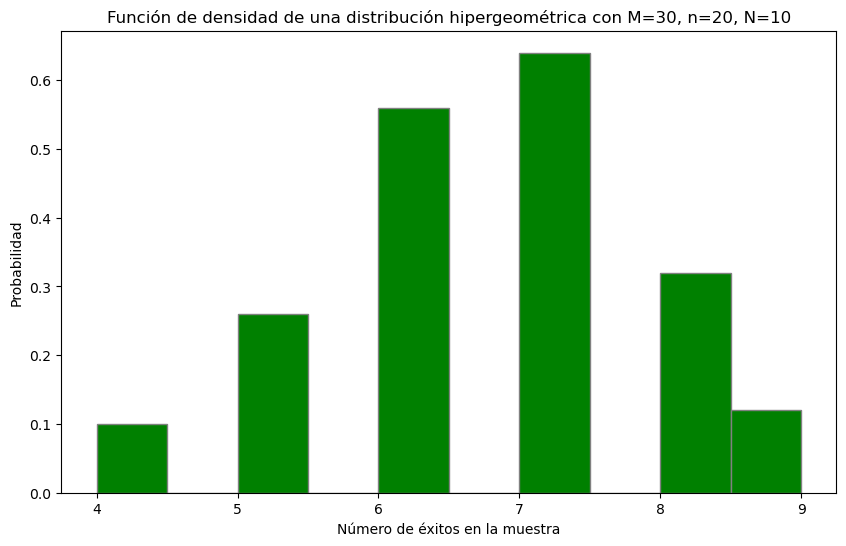

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

# Parámetros
M = 30   
n = 20   
N = 10   
s = 100

# Fijar la semilla para reproducibilidad
np.random.seed(3)

# Generamos números aleatorios que siguen una distribución hipergeométrica
hypergeom_numeros = sps.hypergeom.rvs(M, n, N, size=s)

# Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    hypergeom_numeros,
    density=True,  # Normaliza el área para que sea 1
    bins=10,       # Número de barras del histograma
    color="green",
    edgecolor="grey"
)

plt.xlabel('Número de éxitos en la muestra')
plt.ylabel('Probabilidad')
plt.title(f'Función de densidad de una distribución hipergeométrica con M={M}, n={n}, N={N}')
plt.show()  # Mostrar la gráfica

In [ ]:
#Ejercicio 7

$\color{red}{\text{Ejercicio 7.}}$ Una compañía petrolera realiza un estudio geológico que indica que un pozo petrolero exploratorio debería tener un 20% de posibilidades de encontrar petróleo.

- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?

In [2]:
#¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

def probabilidad_pozo(p, k):
    return (1 - p) ** (k - 1) * p

p = 0.20
k = 3
probabilidad = probabilidad_pozo(p, k)
print(probabilidad)

0.12800000000000003


In [10]:
#¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?
import scipy.stats as stats
p = 0.20  
r = 3     
k = 7     

probabilidad = stats.nbinom.pmf(k, r, p)


print(f"La probabilidad de que el tercer pozo exitoso se produzca en el séptimo pozo perforado es: {probabilidad}")

La probabilidad de que el tercer pozo exitoso se produzca en el séptimo pozo perforado es: 0.06039797760000005


In [8]:
# Parámetros
p = 0.20  
r = 3     

media = r / p
varianza = r * (1 - p) / (p ** 2)

print(f"Media: {media}")
print(f"Varianza: {varianza}")

Media: 15.0
Varianza: 60.0
